In [2]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.table import Table
from sklearn.decomposition import FastICA
import requests
from tqdm import tqdm

In [3]:
sb2_fits = fits.open("apogee_sb2s-v1_0.fits", memmap=True)
sb2_data = sb2_fits[1].data
all_visit = fits.open("allVisit-dr17-synspec_rev1.fits")
all_visit_data = all_visit[1].data
N_all_visit = all_visit[1].data.shape[0]

FileNotFoundError: [Errno 2] No such file or directory: 'apogee_sb2s-v1_0.fits'

In [3]:
sb2_filter = []
for i in range(0, sb2_data.shape[0]):
    arr = sb2_data[i][10]
    if arr[0] >= 3 and arr[1] >= 3 and arr[2] == 0 and arr[3] == 0:
        sb2_filter.append(i)

In [4]:
filtered_sb2_data = []
for i in range(0,len(sb2_filter)):
    filtered_sb2_data.append(sb2_data[sb2_filter[i]])

In [5]:
all_sb2_names = []
N = len(filtered_sb2_data)
for i in range(0, N):
    all_sb2_names.append(filtered_sb2_data[i][0])

In [6]:
res = []
[res.append(x) for x in all_sb2_names if x not in res];

In [66]:
res

['2M00004521-7219055',
 '2M00005196+0022164',
 '2M00005343+0040594',
 '2M00015725+5726512',
 '2M00023036+8524194',
 '2M00023179+1521164',
 '2M00024876-0018006',
 '2M00025149-0015001',
 '2M00033917+0204106',
 '2M00041734-7301536',
 '2M00043378-0007544',
 '2M00044532+0003233',
 '2M00050265+0116236',
 '2M00053915+0009237',
 '2M00054337+0156531',
 '2M00060737-5145009',
 '2M00061836-0013018',
 '2M00062867+6955129',
 '2M00063250+1453528',
 '2M00065234+0151397',
 '2M00065508+0154022',
 '2M00065658+0013309',
 '2M00074456-7655057',
 '2M00090157-5141321',
 '2M00092179+0038065',
 '2M00095079+0047248',
 '2M00100066-5114386',
 '2M00101177-2004054',
 '2M00111801-2114586',
 '2M00114241-5222084',
 '2M00115517-2029008',
 '2M00125652+1406190',
 '2M00132431-1410460',
 '2M00132731-2001400',
 '2M00135678-2011519',
 '2M00140613+8541300',
 '2M00141786-7757569',
 '2M00155291+8507242',
 '2M00170781+8551505',
 '2M00171366-1436005',
 '2M00171482-1510258',
 '2M00171810-1453037',
 '2M00174348+1600039',
 '2M0017446

In [7]:
lst_of_all_data = []
for j in tqdm(range(0, N_all_visit)):
    lst_of_all_data.append(all_visit_data[j][0])

100%|██████████████████████████████| 2659178/2659178 [01:21<00:00, 32704.61it/s]


In [8]:
from more_itertools import locate
ID = res[0]
temp = list(locate(lst_of_all_data, lambda x: x == ID))
print(temp)

[653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664]


In [9]:
binary = []
for i in tqdm(range(0, len(res))):
    ID = res[i]
    ind = 0
    temp = list(locate(lst_of_all_data, lambda x: x == ID))
    for indxs in temp:
        binary.append(all_visit_data[indxs])

100%|███████████████████████████████████████| 6981/6981 [33:59<00:00,  3.42it/s]


In [10]:
all_visit_mjd = [binary[i][7] for i in range(len(binary))]

In [11]:
all_sb2_mjd = list(set([int(np.floor(filtered_sb2_data[i][1])) for i in range(len(filtered_sb2_data))]))

In [12]:
#NEED TO COLLECT NEW DATA THAT MATCHES MJD OF TESTING TO MJD OF BINARY
temp_list = []
appp_id = []
for i in tqdm(range(0,len(all_sb2_mjd))):
    try:
        mjd_0 = all_sb2_mjd[i]
        idx = all_visit_mjd.index(mjd_0)
        temp_list.append(binary[idx][3])
        appp_id.append(binary[idx][0])
    except ValueError:
        pass

100%|███████████████████████████████████████| 1887/1887 [00:48<00:00, 39.31it/s]


In [13]:
len(temp_list)

1853

In [80]:
appp_id

['2M03521852+2451334',
 '2M03521852+2451334',
 '2M00132431-1410460',
 '2M00315685+5743383',
 '2M01410040-1811188',
 '2M02512773-1649482',
 '2M04115246+2349579',
 '2M04115246+2349579',
 '2M03575528+1051182',
 '2M04423093+3258075',
 '2M06525427+2545517',
 '2M06525427+2545517',
 '2M07595891+4747070',
 '2M08494022+5509176',
 '2M08202415+4633577',
 '2M08202415+4633577',
 '2M08202415+4633577',
 '2M09405927+4615341',
 '2M07544617+5107504',
 '2M07544617+5107504',
 '2M00315685+5743383',
 '2M04222563+5933026',
 '2M00431061-1125472',
 '2M00315685+5743383',
 '2M08211035-0002136',
 '2M11481344+0031377',
 '2M08211035-0002136',
 '2M10231840+3606221',
 '2M09361593+3731456',
 '2M09361593+3731456',
 '2M11140507+2244156',
 '2M03345631+6419248',
 '2M04222563+5933026',
 '2M04311419+0041104',
 '2M03345631+6419248',
 '2M03221246+2102067',
 '2M02512773-1649482',
 '2M05165888+2507025',
 '2M05224331+0328389',
 '2M05224331+0328389',
 '2M05165888+2507025',
 '2M09242664+2848343',
 '2M05165888+2507025',
 '2M0821103

In [14]:
temp_list = list(set(temp_list))

In [273]:
f = open("data.txt", "a")
for x in temp_list:
    one = x.split("-")[2]
    two = x.split("-")[3]
    f.write("https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/plates/" + one + "/" + two + "/" + x + "\n")
f.close()

In [660]:
all_sb2_mjd = list(set(all_sb2_mjd))

In [274]:
for i in range(len(filtered_sb2_data)):
    if filtered_sb2_data[i][10][0] == 0 and filtered_sb2_data[i][10][1] == 0:
        print(filtered_sb2_data[i][10])

In [275]:
start = 0
for i in tqdm(range(0,len(temp_list))):
    try:
        mjd_0 = all_sb2_mjd[i]
        idx = all_visit_mjd.index(mjd_0)
        extract_data_0 = binary[idx]
        extract_data_1 = filtered_sb2_data[i]
        
        filename = str(extract_data_0[3])
        mjd = int(extract_data_0[7])
        apogeeID = extract_data_1[0]
        visitno = int(extract_data_0[4])
        try:
            testing_data = fits.open("../../../data/" + extract_data_0[3], memmap=True)
        except FileNotFoundError:
            continue
        fluxa = [float(a) for a in testing_data[1].data[0]]
        wavelengtha = [float(a) for a in testing_data[4].data[0]]
        fluxb = [float(a) for a in testing_data[1].data[1]]
        wavelengthb = [float(a) for a in testing_data[4].data[1]]
        fluxc = [float(a) for a in testing_data[1].data[2]]
        wavelengthc = [float(a) for a in testing_data[4].data[2]]
        ampa = float(extract_data_1[4][0])
        vhelioa = float(extract_data_1[5][0])
        fwhma = float(extract_data_1[6][0])
        ampb = float(extract_data_1[4][1])
        vheliob = float(extract_data_1[5][1])
        fwhmb = float(extract_data_1[6][1])
        SNR = float(extract_data_0["SNR"])
        if np.isnan(ampa) or np.isnan(SNR) or np.isnan(vhelioa) or np.isnan(ampa) or np.isnan(fwhma) or np.isnan(ampb) or np.isnan(vheliob) or np.isnan(fwhmb):
            continue
        attr = ["filename", "apogeeID", "visitno", "fluxa", "wavelengtha", "fluxb", "wavelengthb", "fluxc", "wavelengthc",
                     "ampa", "vhelioa", "fwhma", "ampb", "vheliob", "fwhmb", "SNR", "mjd"]
        vals = [filename, apogeeID, visitno, fluxa, wavelengtha, fluxb, wavelengthb, fluxc, wavelengthc,
                         ampa, vhelioa, fwhma, ampb, vheliob, fwhmb, SNR, mjd]
        to_json = {a:b for a,b in zip(attr,vals)}
        requests.post('http://127.0.0.1:5000/test', json=to_json)
    except ValueError:
        print("bruh")
        pass

  1%|▍                                        | 18/1853 [00:12<13:28,  2.27it/s]

bruh


  3%|█▎                                       | 61/1853 [00:31<13:17,  2.25it/s]

bruh


 13%|█████                                   | 233/1853 [01:35<17:04,  1.58it/s]

bruh


 13%|█████▎                                  | 244/1853 [01:43<19:47,  1.35it/s]

bruh


 13%|█████▎                                  | 246/1853 [01:43<15:23,  1.74it/s]

bruh


 13%|█████▍                                  | 249/1853 [01:45<14:14,  1.88it/s]

bruh


 14%|█████▌                                  | 255/1853 [01:48<15:32,  1.71it/s]

bruh


 15%|██████                                  | 281/1853 [02:03<17:34,  1.49it/s]

bruh


 16%|██████▎                                 | 293/1853 [02:05<03:41,  7.03it/s]

bruh


 17%|██████▊                                 | 315/1853 [02:17<14:07,  1.82it/s]

bruh


 27%|██████████▉                             | 508/1853 [04:01<14:56,  1.50it/s]

bruh


 28%|███████████                             | 511/1853 [04:03<12:20,  1.81it/s]

bruh


 28%|███████████                             | 515/1853 [04:04<07:07,  3.13it/s]

bruh


 28%|███████████▏                            | 518/1853 [04:05<08:33,  2.60it/s]

bruh


 29%|███████████▌                            | 536/1853 [04:17<12:27,  1.76it/s]

bruh


 29%|███████████▌                            | 538/1853 [04:18<11:10,  1.96it/s]

bruh


 30%|████████████                            | 556/1853 [04:29<14:54,  1.45it/s]

bruh


 38%|███████████████▎                        | 708/1853 [05:51<11:42,  1.63it/s]

bruh


 40%|████████████████                        | 744/1853 [06:12<05:49,  3.17it/s]

bruh


 41%|████████████████▏                       | 751/1853 [06:17<10:47,  1.70it/s]

bruh


 53%|█████████████████████▏                  | 981/1853 [08:12<06:27,  2.25it/s]

bruh


 54%|█████████████████████                  | 1000/1853 [08:20<06:28,  2.20it/s]

bruh


 73%|████████████████████████████▌          | 1355/1853 [10:30<02:23,  3.48it/s]

bruh


 74%|████████████████████████████▊          | 1369/1853 [10:36<03:49,  2.11it/s]

bruh


 75%|█████████████████████████████▏         | 1386/1853 [10:43<03:04,  2.53it/s]

bruh


 80%|███████████████████████████████        | 1474/1853 [10:57<00:48,  7.75it/s]

bruh


 81%|███████████████████████████████▌       | 1500/1853 [11:06<01:37,  3.62it/s]

bruh


 84%|████████████████████████████████▌      | 1549/1853 [11:28<01:23,  3.63it/s]

bruh


 85%|█████████████████████████████████      | 1570/1853 [11:34<00:38,  7.28it/s]

bruh
bruh


 86%|█████████████████████████████████▎     | 1585/1853 [11:39<00:39,  6.79it/s]

bruh


 95%|████████████████████████████████████▉  | 1753/1853 [12:30<00:30,  3.25it/s]

bruh
bruh


100%|███████████████████████████████████████| 1853/1853 [12:58<00:00,  2.38it/s]


In [362]:
ids = requests.get('http://127.0.0.1:8050/get-snr/50')

In [363]:
ids.json()

{'0': ['2M00004521-7219055', 76.34500122070312],
 '1': ['2M00004521-7219055', 131.47999572753906],
 '10': ['2M00015725+5726512', 568.39501953125],
 '100': ['2M00232133-0000098', 59.275699615478516],
 '101': ['2M00232133-0000098', 54.402198791503906],
 '102': ['2M00232133-0000098', 55.689701080322266],
 '103': ['2M00233946+0024342', 98.23780059814453],
 '104': ['2M00235207-0041332', 66.08309936523438],
 '105': ['2M00235207-0041332', 66.85769653320312],
 '106': ['2M00235207-0041332', 52.11759948730469],
 '107': ['2M00235815+0240238', 106.05000305175781],
 '108': ['2M00240490+0023172', 73.39929962158203],
 '109': ['2M00240490+0023172', 68.96790313720703],
 '11': ['2M00023036+8524194', 572.1859741210938],
 '110': ['2M00244842+0118385', 84.86029815673828],
 '111': ['2M00244842+0118385', 67.83290100097656],
 '112': ['2M00254729+7011069', 94.40239715576172],
 '113': ['2M00265766-1440511', 114.39900207519531],
 '114': ['2M00274757+6956505', 124.7030029296875],
 '115': ['2M00280680+5558136', 12

In [310]:
temp = dict(sorted(ids.json().items(), key=lambda item: item[1]))

In [317]:
[i[1][0] + "  " + str(i[1][1]) for i in temp.items()]

['2M00015725+5726512  568.39501953125',
 '2M00015725+5726512  668.56201171875',
 '2M00023036+8524194  572.1859741210938',
 '2M00092179+0038065  583.6950073242188',
 '2M00225316+0010357  527.6179809570312',
 '2M00362511+3408151  541.2589721679688',
 '2M00362511+3408151  665.6799926757812',
 '2M00363416+8529046  568.7150268554688',
 '2M01101176-0814306  527.4710083007812']

In [344]:
binary_star_vist = requests.get('http://127.0.0.1:8050/get-binary/2M00023036+8524194')

In [345]:
temp = binary_star_vist.json()

In [346]:
temp.keys()

dict_keys(['2M00023036+8524194101.56999969482422', '2M00023036+8524194102.37000274658203', '2M00023036+8524194115.09600067138672', '2M00023036+8524194122.05799865722656', '2M00023036+852419421.32740020751953', '2M00023036+852419422.34320068359375', '2M00023036+852419426.702199935913086', '2M00023036+8524194321.968994140625', '2M00023036+852419433.79399871826172', '2M00023036+852419436.31079864501953', '2M00023036+852419439.720298767089844', '2M00023036+852419440.37620162963867', '2M00023036+852419443.15679931640625', '2M00023036+8524194431.9219970703125', '2M00023036+852419446.708900451660156', '2M00023036+85241945.622779846191406', '2M00023036+852419450.967899322509766', '2M00023036+8524194572.1859741210938', '2M00023036+852419458.425899505615234', '2M00023036+852419463.73630142211914', '2M00023036+852419470.677001953125', '2M00023036+852419471.0062026977539', '2M00023036+852419479.57129669189453', '2M00023036+852419491.18550109863281'])

In [352]:
res = temp["2M00023036+8524194102.37000274658203"]
df = pd.DataFrame.from_dict(res)

In [353]:
df

,A,B,C
0,"[4253.2578125, 4252.95703125, 4252.64453125, 4...","[3509.30712890625, 3509.820068359375, 3510.333...","[3173.3046875, 3173.486328125, 3173.6662597656..."
1,"[15809.561105265911, 15809.40796109688, 15809....","[16434.721647180362, 16434.591176429, 16434.46...","[16954.139444061962, 16954.03329901416, 16953...."


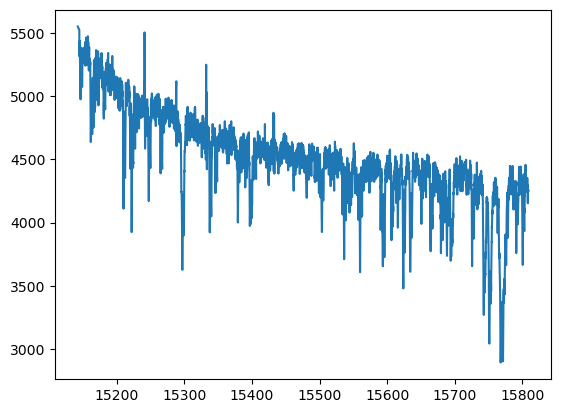

In [354]:
i=0
data_y = df["A"][0]
data_x = df["A"][1]
plt.plot(data_x, data_y)

In [341]:
ica_test = np.vstack((data_x,data_y))

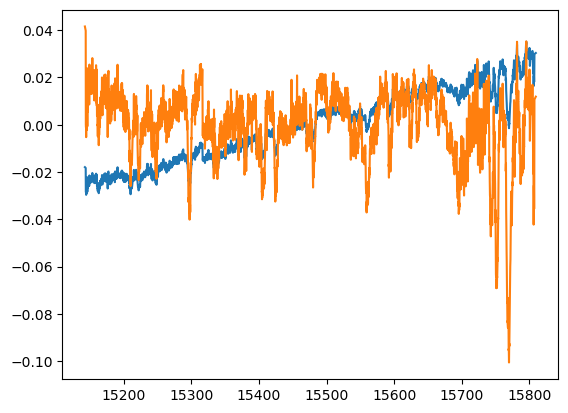

In [342]:
ica = FastICA(n_components=2)
S_ica_ = ica.fit_transform(ica_test.T) # Estimate the sources
plt.plot(data_x, S_ica_[:,0])
plt.plot(data_x, S_ica_[:,1])

In [15]:
allstar = fits.open("../../../Downloads/allStar-dr17-synspec_rev1.fits")

In [16]:
allstarLen = len(allstar[1].data)
names = []
for i in range(allstarLen):
    names.append(allstar[1].data[i][1])

In [21]:
appp_id = list(set(appp_id))

In [22]:
idxList = []
for i in tqdm(range(0, len(appp_id))):
    ids = appp_id[i]
    idxList.append(names.index(ids))

100%|████████████████████████████████████████| 886/886 [00:05<00:00, 157.78it/s]


In [23]:
idxList = list(set(idxList))

In [36]:
allstar[1].data[idx][1]

'2M16244921+3809105'

In [55]:
dirs = []
fnames = {}
apps_ids = []
for idx in idxList:
    fname = allstar[1].data[idx][0]
    appogeeid = allstar[1].data[idx][1]
    apps_ids.append(appogeeid)
    fnames[appogeeid] = fname
    directory = allstar[1].data[idx][2]
    lst = directory.split(".")[0:2]
    strng = "/" + "/".join(lst) + "/" + fname
    dirs.append(strng)

In [87]:
dirs = ["https://data.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/" + d for d in dirs]

In [88]:
f = open("data_apstar.txt", "a")
for d in dirs:
    f.write(d + "\n")
f.close()

In [165]:
data_for_apstar = requests.get('http://127.0.0.1:8050/get-binary/2M00362511+3408151')

In [231]:
star = fits.open("../../../data_apstar/apStar-dr17-2M18453580-0240470.fits")

In [77]:
for i in apps_ids:
    print(i)

2M19285825+2710582
2M13080487+1351179
2M16270971+3820285
2M13011891+4706290
2M03142472+4720598
2M19002037+6800360
2M13080617+1753494
2M18104783-2824046
2M20393110+2011240
2M03222913+0042006
2M01043554+0919402
2M12505546+1219564
2M03222918+5134159
2M05345563-0601036
2M21082794+4710102
2M13113653+5200398
2M03274493+2801464
2M08352765+5442567
2M06275567-7052476
2M00554823+1407343
2M11414704-1447344
2M07350917+6540252
2M04053675+1957179
2M00475517+0057047
2M00412193+1657591
2M01342845+3145547
2M10300418-5007109
2M03393491+1818518
2M02290198-0945113
2M01135326+0659425
2M07535125+3331546
2M07444028+7946423
2M08460130-1509051
2M16051814+3726238
2M08590441+2114429
2M01521669+3815063
2M00555518-6512090
2M00362511+3408151
2M01521747-0320098
2M08314029+5348525
2M18205706-0921313
2M04503647+4519494
2M07413927+5305101
2M03575528+1051182
2M10054841+0158109
2M12131474+1359248
2M05460266+1442125
2M07583003+2216140
2M10191833+1055589
2M18453580-0240470
2M10581378+1127335
2M01045170+3742429
2M05334627+3

In [80]:
for i in tqdm(apps_ids):
    if fnames[i] == "":
        continue
    try:
        star = fits.open("../../../data_apstar/" + fnames[i])
    except FileNotFoundError:
        continue
    apogeeID = i
    visits = star[0].header["NVISITS"]
    lst_ccf = []
    lst_mjd = []
    for i in range(2, visits):
        mjd = int(np.floor(star[9].data[i]["jd"]))
        ccf_y = [float(a) if not np.isnan(a) else 0 for a in star[9].data[i]['CCF']]
        lst_ccf.append(ccf_y)
        lst_mjd.append(mjd)
    attr = ["apogeeID", "nvisits", "mjd", "ccf"]
    vals = [apogeeID, visits, lst_mjd, lst_ccf]
    to_json = {a:b for a,b in zip(attr,vals)}
    requests.post('http://127.0.0.1:8050/addccf', json=to_json)

100%|█████████████████████████████████████████| 886/886 [08:04<00:00,  1.83it/s]


In [334]:
#cross cor
star[9].data[0]["jd"]

2455818.61626

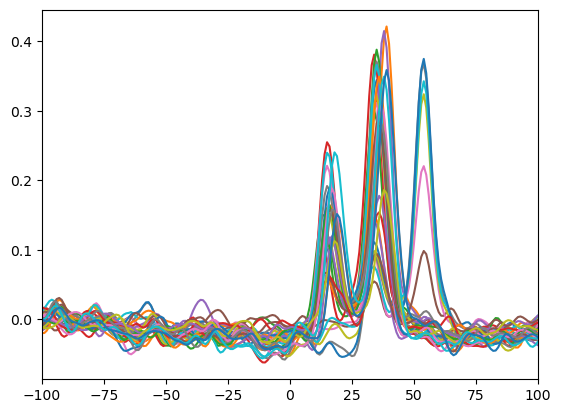

In [328]:
visits = star[0].header["NVISITS"]
for i in range(2,visits):
    ccf_y = star[9].data[i]['CCF']
    ccf_x = np.arange(-382,383, 1)
    plt.xlim(-100,100)
    plt.plot(ccf_x, ccf_y)

In [81]:
temp = requests.get('http://127.0.0.1:8050/get-binary/2M00004521-7219055')

In [82]:
temp.json()["2M00004521-7219055114.77999877929688"]["MJD"]

57348

In [ ]:
ids = requests.get('http://127.0.0.1:8050/get-ccf/2M00004521-7219055')
ids.json().keys()

dict_keys(['59155', '59156', '59157', '59158', '59159', '59160', '59162', '59164', '59165', '59166'])

In [148]:
data_for_apstar = requests.get('http://127.0.0.1:8050/get-binary/2M00004521-7219055')

In [151]:
data_for_apstar.json()["2M00004521-7219055114.77999877929688"]["MJD"]

57348

In [152]:
data_for_apstar.json()["2M00004521-7219055114.77999877929688"]["fname"]

'apVisit-dr17-8702-57348-257.fits'

In [153]:
testing_data = fits.open("../../../data/apVisit-dr17-8702-57348-257.fits")

In [154]:
testing_data[0].header["MJD5"]

57348

In [156]:
testing_data[0].header["RA"]

7.986915

In [157]:
testing_data[0].header["DEC"]

57.727306

In [158]:
testing_data[0].header["OBJID"]

'2M00315685+5743383'

In [92]:
star = fits.open("../../../data_apstar/apStar-dr17-2M00212698+0309415.fits")

In [131]:
int(np.floor(star[9].data[0]["jd"]))-2400000

58036

In [20]:
result = dict(sorted(ids.json().items(), key=lambda item: item[1]))
for i in result.items():
    if i[1][0] == 
[i[1][0] for i in result.items()]

['2M00015725+5726512',
 '2M00015725+5726512',
 '2M00023036+8524194',
 '2M00092179+0038065',
 '2M00092179+0038065',
 '2M00225316+0010357',
 '2M00362511+3408151',
 '2M00362511+3408151',
 '2M00363416+8529046',
 '2M00392934+8500595',
 '2M00534393-2655048',
 '2M01101176-0814306',
 '2M01551917+3749154',
 '2M01561802+3451173',
 '2M03222918+5134159']

In [3]:
a = np.power(10,star[0].header["CRVAL1"])

NameError: name 'star' is not defined

In [275]:
step = np.power(10,star[0].header["CDELT1"])

In [284]:
temp= np.arange(star[0].header["CRVAL1"], star[0].header["CRVAL1"]+8575*star[0].header["CDELT1"],star[0].header["CDELT1"])

In [286]:
lam = np.power(10, temp)

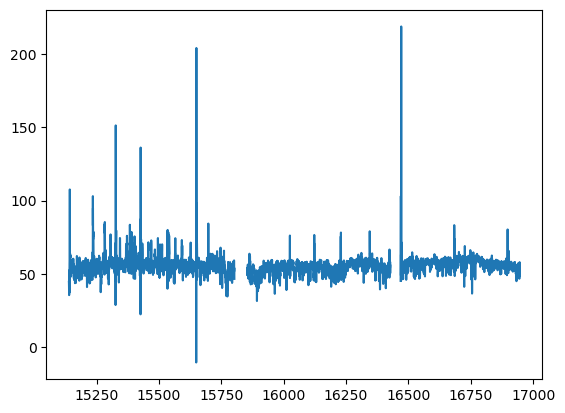

In [287]:
plt.plot(lam, y)

In [ ]:
nm